<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [50]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [55]:
y_train

array([19, 41, 16, ..., 19,  3, 11])

In [51]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [56]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 46
max_features = len(word_index.values())
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)
Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 128)         3965312   
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 4,097,025
Trainable params: 4,097,025
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
# You should only run this cell once your model has been properly configured

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

TypeError: Input 'y' of 'Equal' Op has type float32 that does not match type int32 of argument 'x'.

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

- it transforms the sequences (list of integers) into a 2D numpy array of shape with len(sequence), len(maxlen). if maxlen is not provided, the length of the longest sequence is used instead. 
- sequences that are longer than the 'cut off' are truncated, sequences shorter will be padded with `value`
- thus, results in uniform lengths of sequences for model fitting

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

- LSTM puts more weight on recent events while also taking into consideration important long-term info (e.g. a significant historical year)
- LSTM avoids the problem of vanishing gradients in RNN

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

For LSTMs:
- time-series data (economic forecasting, currency fluctuations, weather forecasting)
- sequential data (natural language processing, predict the next word/character)

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [30]:
!pip install google_images_download

  Using cached https://files.pythonhosted.org/packages/80/d6/4294f0b4bce4de0abf13e17190289f9d0613b0a44e5dd6a7f5ca98459853/selenium-3.141.0-py2.py3-none-any.whl


In [31]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 4, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 1.PKLS4116_inline.png
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116.png
Completed Image ====> 3.PKLS4116.png
Image URL: https://i.pinimg.com/originals/12/ae/e2/12aee2aa186a7b69a66563f138bba822.jpg
Completed Image ====> 4.12aee2aa186a7b69a66563f138bba822.jpg

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [34]:
absolute_image_paths

({'animal pond': ['/Users/elliotgunn/Desktop/DS-Unit-4-Sprint-3-Deep-Learning/sc/downloads/animal pond/1.PKLS4116_inline.png',
   '/Users/elliotgunn/Desktop/DS-Unit-4-Sprint-3-Deep-Learning/sc/downloads/animal pond/2.hqdefault.jpg',
   '/Users/elliotgunn/Desktop/DS-Unit-4-Sprint-3-Deep-Learning/sc/downloads/animal pond/3.PKLS4116.png',
   '/Users/elliotgunn/Desktop/DS-Unit-4-Sprint-3-Deep-Learning/sc/downloads/animal pond/4.12aee2aa186a7b69a66563f138bba822.jpg']},
 0)

In [104]:
# You've got something to do in this cell. ;)

import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a integer with the number of frogs detected in an
    image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path`             function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """    
    model = ResNet50(weights='imagenet')
    features = model.predict(img)
    results = decode_predictions(features, top=10)[0]
    print(results)
    # this returns 
    # [('n04243546', 'slot', 0.8712447), ('n04476259', 'tray', 0.04993625), ('n03908618', 'pencil_box', 0.023072403), ('n03291819', 'envelope', 0.008799029), ('n03485794', 'handkerchief', 0.0042823167), ('n06596364', 'comic_book', 0.003639603), ('n02834397', 'bib', 0.00316159), ('n06359193', 'web_site', 0.0021799414), ('n02971356', 'carton', 0.001807092), ('n03666591', 'lighter', 0.0017496912)]
    
    # we want to extract strings only
    # get this: ['goldfish', 'eft', 'coho'..]
    strings = [tup[1] for tup in results]

    # count frogs - first put all words into a string for string operation
    # e.g. 'goldfish eft coho common_newt fiddler_crab crayfish rock_crab stinkhorn tailed_frog coral_fungus'
    all_words = (' '.join(strings))
    
    # count frogs
    frogs = all_words.count('frog')
      
    return frogs


In [100]:
x = [('n01443537', 'goldfish', 0.8495909), ('n01631663', 'eft', 0.067602254), ('n02536864', 'coho', 0.035163656), ('n01630670', 'common_newt', 0.019974062), ('n01980166', 'fiddler_crab', 0.007944656), ('n01985128', 'crayfish', 0.005331928), ('n01978455', 'rock_crab', 0.0036934733), ('n13040303', 'stinkhorn', 0.0025060528), ('n01644900', 'tailed_frog', 0.0017287089), ('n12985857', 'coral_fungus', 0.001189521)]


In [79]:
x[0][1]

'goldfish'

In [101]:
strings = [tup[1] for tup in x]

In [102]:
strings

['goldfish',
 'eft',
 'coho',
 'common_newt',
 'fiddler_crab',
 'crayfish',
 'rock_crab',
 'stinkhorn',
 'tailed_frog',
 'coral_fungus']

In [103]:
(' '.join(strings))

'goldfish eft coho common_newt fiddler_crab crayfish rock_crab stinkhorn tailed_frog coral_fungus'

#### Displaying Predictions
The next two cells are just to display some of your predictions. You will not be graded on their output. 

In [105]:
import matplotlib.pyplot as plt

def display_predictions(urls):
    image_data = []
    frogs = []
    for url in urls:
        x = process_img_path(url)
        x = image.img_to_array(x)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        image_data.append(x)
        frogs.append(img_contains_frog(x))
    
    return image_data,frogs

[('n04243546', 'slot', 0.8712447), ('n04476259', 'tray', 0.04993625), ('n03908618', 'pencil_box', 0.023072403), ('n03291819', 'envelope', 0.008799029), ('n03485794', 'handkerchief', 0.0042823167), ('n06596364', 'comic_book', 0.003639603), ('n02834397', 'bib', 0.00316159), ('n06359193', 'web_site', 0.0021799414), ('n02971356', 'carton', 0.001807092), ('n03666591', 'lighter', 0.0017496912)]
[('n01443537', 'goldfish', 0.8495909), ('n01631663', 'eft', 0.067602254), ('n02536864', 'coho', 0.035163656), ('n01630670', 'common_newt', 0.019974062), ('n01980166', 'fiddler_crab', 0.007944656), ('n01985128', 'crayfish', 0.005331928), ('n01978455', 'rock_crab', 0.0036934733), ('n13040303', 'stinkhorn', 0.0025060528), ('n01644900', 'tailed_frog', 0.0017287089), ('n12985857', 'coral_fungus', 0.001189521)]
[('n03485794', 'handkerchief', 0.88227344), ('n02834397', 'bib', 0.022680784), ('n03291819', 'envelope', 0.020095093), ('n04209239', 'shower_curtain', 0.015726214), ('n06359193', 'web_site', 0.007684

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[('n02116738', 'African_hunting_dog', 0.59568745), ('n02117135', 'hyena', 0.16904147), ('n02105162', 'malinois', 0.09024964), ('n02114712', 'red_wolf', 0.069068566), ('n02091467', 'Norwegian_elkhound', 0.019712964), ('n02115913', 'dhole', 0.01911098), ('n02115641', 'dingo', 0.012764026), ('n02106662', 'German_shepherd', 0.010368139), ('n01877812', 'wallaby', 0.0044920314), ('n02110806', 'basenji', 0.0020854354)]


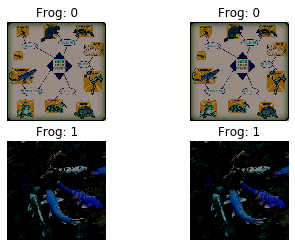

In [106]:
f, axarr = plt.subplots(2,2)

imgs, frogs = display_predictions(absolute_image_paths[0]['animal pond'])

for x,y in [(0,0),(0,1), (1,0), (1,1)]:  
    axarr[x,y].imshow(np.squeeze(imgs[x], axis=0) / 255)
    axarr[x,y].set_title(f"Frog: {frogs[x]}")
    axarr[x,y].axis('off')

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

- A common usecase for autoencoders is for reverse image search
- this is helpful when the input data is unlabelled 
- it uses backprop 

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist
    - communicating results clearly and effectively (as a story)
    - statistical analysis (being careful with assumptions)
- What area of Data Science would you most like to learn more about, and why?
    - get more solid foundation in OLS and logistic regressions, as they seem good enough or superior for most use cases
    - how to work with spatial data, as it seems increasily important, but is known to be difficult to work with 
    - learn a second language (R)
    - OOP and figuring out unit testing
    - bayesian hierarchical inference models
    - making, using APIs
    - Docker 
- Where do you think Data Science will be in 5 years?
    - the bar will get higher, moving towards including full-stack skills
- What are the threats posed by AI to our society?
    - because AI learns and solves differently, or optimizes in ways we would not expect, it can lead to catastrophic outcomes for human lives 
    - outsourcing important decisions to AI, or automating things like weapons systems could undercut the 'mutual threat of destruction' system that has kept the peace in the nuclear era (there have been close calls only averted due to human judgement and caution)
    - more unequal classes in society, between groups that want to augment themselves with technology, and groups that do not, leading to better economic outcomes for the former
- How do you think we can counteract those threats? 
    - creating international laws and standards over what kinds of technologies are acceptable at which levels of society
    - being aware of how human biases can be captured in algorithms and worsen different kinds of inequalities 
- Do you think achieving General Artifical Intelligence is ever possible?
    - it's a matter of when, not if. it won't be for a long, long time due to technological stagnation, political opposition

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [49]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")